# Morphological Skeleton

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

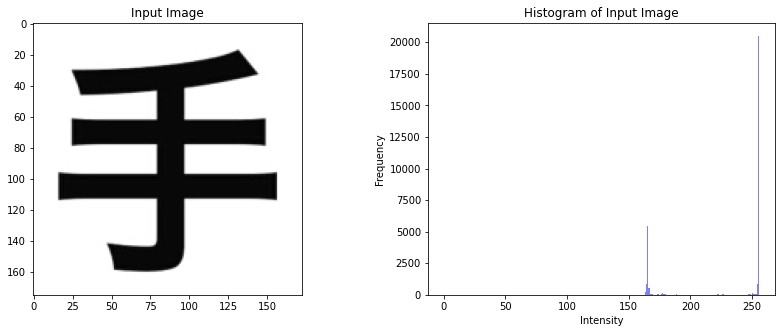

In [2]:
img = cv.imread('images/letter.bmp', cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].hist(img.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5)
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Input Image')

plt.subplots_adjust(wspace=0.25)
plt.show()

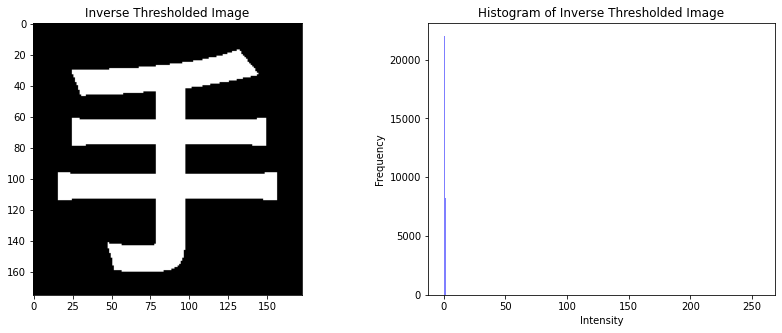

In [3]:
threshold, inv_thresh_img = cv.threshold(img, img.mean(), 255, cv.THRESH_BINARY_INV)
inv_thresh_img = inv_thresh_img // 255

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].imshow(inv_thresh_img, cmap='gray')
ax[0].set_title('Inverse Thresholded Image')
ax[1].hist(inv_thresh_img.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5)
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Inverse Thresholded Image')

plt.subplots_adjust(wspace=0.25)
plt.show()

In [4]:
structuring_element = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
print('Structuring Element: \n', structuring_element)

Structuring Element: 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


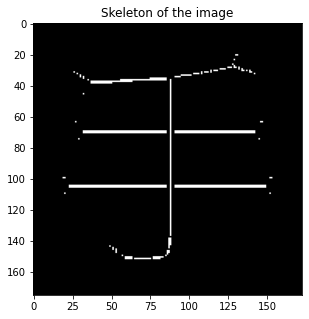

In [5]:
eroded = cv.erode(inv_thresh_img, structuring_element, iterations=0)
opened = cv.morphologyEx(eroded, cv.MORPH_OPEN, structuring_element, iterations=0)
output = np.zeros(inv_thresh_img.shape[:2], dtype= np.uint8)

while(eroded.any()):
    eroded = cv.erode(eroded, structuring_element, iterations=1)
    opened = cv.morphologyEx(eroded, cv.MORPH_OPEN, structuring_element, iterations=1)
    skelet = eroded - opened
    output = cv.bitwise_or(output, skelet)

plt.figure(figsize=(14, 5))
plt.imshow(output, cmap='gray')
plt.title('Skeleton of the image')
plt.show()